# Aprendizaje Automático
# Projecto Final

Profesor: Felipe Meza

Tecnológico de Costa Rica, 

Programa Ciencia de Datos

---

Estudiantes:

1. Sophia Contreras
2. Yoksan Varela
3. Mauro Víquez

Lista de las librerias por ser usadas:

In [1]:
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from datetime import timedelta
import re

## Descripcion del problema
En el portafolio de productos para Intervenciones Cardiacas de BSC, existe un producto llamado Watchmen. La funcion de este producto es ayudar a los pacientes que subre de una enfermedad llamada Fibrilacion Auricular No Valvular (NVAF por sus siglas en ingles), la cual consiste en un tipo comun de ritmo cardiaco irregular que afecta la parte superior del corazon (las auriculas) y puede aumentar el riesgo de coagulos sanguineos, accidentes cerebrovasculares y otras complicaciones cardiovasculares.

Tradicionalmente, el tratamiento de esta condicion implica un consumo de anti-coagulantes, lo cual puede ser una situacion tediosa y complicada para los pacientes (sin tomar en cuenta efectos secundarios del medicamento). El dispositivo Watchmen fue creado como tratamiento alternativo para esta enfermedad, ya que este se introduce dentro del corazon y su funciones de "cerrar" las cavidades donde los coagulos se pueden generar, de manera que el paciente puede minimizar el uso de medicamentos anti-coagulantes.

El siguiente enlace muestra generalidades del producto y como se implanta: https://www.youtube.com/watch?v=1f33kyMh9rM. Interesante rescatar del video que el procedimiento medico toma alrededor de 1 hora y el paciente solo debe estar hospitalizado durante un dia.

El dispositivo esta compuesto por varias partes, pero para efectos practicos, solo vamos a referirnos a la estructura de metal que esta por debajo de la malla de recubrimiento y sera referenciada como el esqueleto del Watchmen. Ese esqueleto esta hecho de Nitinol, una aleacion de niquel con titanio tiene muchas caracteristicas interesantes, pero la mas relevante para este estudio es que el Nitinol tiene memoria de forma, lo que implica que las estructuras hechas con este material van a recuperar su forma inicial despues de ser deformada, aunque esta deformacion se repita multiples veces.

Esto implica un reto a la hora de producir este esqueleto dado que, inicialmente, no tiene la formal final que se observa en el video; ademas que existen varios tamanos de Watchmen dado que existen varios tamanos de corazon. Para poder darle la forma final, el esqueleto se debe someter a diferentes tratamientos quimicos y fisicos para poder desgastar parte del material y ser moldeado al mismo tiempo.

Luego de este proceso de formado se tiene una prueba de estres, donde los esqueletos son sometidos a deformaciones durante una cantidad de ciclos establecida, y recientemente se ha encontrado un incremento en una condicion de fallo: quebraduras. Despues del ciclos de estres, la estructura esta quebrada.

Como el proceso de formacion es el unico que cambia la constitucion estructural del esqueleto, se quiere entender el efecto de las variables de ese proceso con respecto a si la pieza se quebro o no. Entonces, la pregunta que se quiere responder: hay alguna relacion directa entre las variables controladas en el proceso de formacion con las quebraduras durante el estres? Esto es un problema de categorizacion.

Es importante aclarar que, inicialmente, el set de datos completo cuenta con esqueletos de todos los tamanos, pero este estudio solamente sera enfocado al tamano de 20 mm.

### Primera parte: Pre-procesado del set de datos
Importemos el set de datos creando un dataframe:

In [2]:
dataset_Wathcmen = pd.read_csv("https://raw.githubusercontent.com/YoksanVC/TEC_DataScienceCert/main/Module_2_AprendizajeAutomatico/BSC_Dataset/wm_ShapeProccess_BrokenScrap.csv", header=0, delimiter=',')
dataset_Wathcmen.head()

,Counter,Tank1EPProcessTemperature,Tank1EPPumpSpeed,Tank1EPPumpFlow,Tank1ResisChk,EPEndRunDT,EPMassEndRunDT,BatchNo,PartName,Size,...,EPEndRunDT_CST,start_tank_chg,end_tank_chg,tank_chg_period,conduc_test_count,total_period_mass,group_index,fi_submitter_name,UnitDispo,Part
0,0,-58.43495,8541.579,0.414121,-65537,25:47.4,12:57.7,32370648,32370648-003,27mm,...,25:47.4,9/13/2023 19:01,9/14/2023 17:56,0 days 22:55:50,0,68.8,0,ekoueba,*PASS,32370648-003
1,1,-59.41647,1378.097,7.053833,-65536,02:01.0,05:53.2,32387101,32387101-003,24mm,...,02:01.0,9/14/2023 17:56,9/15/2023 2:12,0 days 08:15:25,1,573.9,1,dunorp,*PASS,32387101-003
2,2,-59.39440,1390.652,6.905866,-65536,02:01.0,05:27.6,32387101,32387101-001,24mm,...,02:01.0,9/14/2023 17:56,9/15/2023 2:12,0 days 08:15:25,1,573.9,1,dunorp,*PASS,32387101-001
3,3,-59.42896,1374.368,6.841251,-65536,21:11.1,12:06.9,32387101,32387101-009,24mm,...,21:11.1,9/14/2023 17:56,9/15/2023 2:12,0 days 08:15:25,1,573.9,1,dunorp,*PASS,32387101-009
4,4,-59.12017,1375.269,7.009933,-65536,21:11.1,11:42.8,32387101,32387101-007,24mm,...,21:11.1,9/14/2023 17:56,9/15/2023 2:12,0 days 08:15:25,1,573.9,1,dunorp,*PASS,32387101-007


Como solo estamos interesados en los datos de esqueletos de 20mm, se procede a hacer un nuevo dataset con los datos de ese tamano:

In [3]:
dataset_20mm = dataset_Wathcmen.loc[dataset_Wathcmen['Size'] == "20mm"]
dataset_20mm.head()

,Counter,Tank1EPProcessTemperature,Tank1EPPumpSpeed,Tank1EPPumpFlow,Tank1ResisChk,EPEndRunDT,EPMassEndRunDT,BatchNo,PartName,Size,...,EPEndRunDT_CST,start_tank_chg,end_tank_chg,tank_chg_period,conduc_test_count,total_period_mass,group_index,fi_submitter_name,UnitDispo,Part
7,7,-59.32403,1374.678,6.924414,-65536,55:16.7,06:38.8,32387011,32387011-005,20mm,...,55:16.7,9/14/2023 17:56,9/15/2023 2:12,0 days 08:15:25,1,573.9,1,morem10,*PASS,32387011-005
8,8,-59.47844,1373.398,6.901890,-65536,55:16.7,06:16.5,32387011,32387011-004,20mm,...,55:16.7,9/14/2023 17:56,9/15/2023 2:12,0 days 08:15:25,1,573.9,1,morem10,WM34-Tweezers Mark/ContactMark,32387011-004
9,9,-59.34805,1365.239,7.110339,-65536,58:16.8,08:09.0,32387011,32387011-009,20mm,...,58:16.8,9/14/2023 17:56,9/15/2023 2:12,0 days 08:15:25,1,573.9,1,morem10,*PASS,32387011-009
10,10,-59.42452,1368.157,6.715863,-65536,58:16.8,07:25.7,32387011,32387011-007,20mm,...,58:16.8,9/14/2023 17:56,9/15/2023 2:12,0 days 08:15:25,1,573.9,1,morem10,*PASS,32387011-007
11,11,-59.41494,1384.787,6.880256,-65536,17:54.9,09:20.4,32387011,32387011-013,20mm,...,17:54.9,9/14/2023 17:56,9/15/2023 2:12,0 days 08:15:25,1,573.9,1,morem10,*PASS,32387011-013


Analizemos la cantidad de instancias luego del filtrado:

In [4]:
dataset_20mm.shape

(1235, 26)

Contamos con 1235 instancias en este momento, con 26 columnas. La clase que nos interesa es Broken que indica si la pieza se quebro al final de la prueba de estres. 

El problema en este momento es que tenemos 25 atributos con datos, asi que se procede a eliminar las siguientes columnas:
- Counter: Es un consecutivo creado por el proceso de extraccion de datos, no tiene utilidad.
- Size: Ya no necesitamos esta columna porque ya filtramos con los datos de esta.
- EP EQR: Numero de control de los equipos, todas las mediciones usan el mismo.
- EPEndRunDT, EPEndRunDT_CST: Estos features hacen referencia al tiempo del proceso que tienen los datos duplicados, ademas que hay otra columna de tiempo que tenemos que parece tener mejor informacion.
- Start Mass, Final Mass y Percent Rem: Estos 3 features no son necesarios porque hacen referencia a la clase de interes. El calculo que se hace en el sistema para "Qyt Rem" es la resta de Start Mass y Final Mass; Percent Rem es lo mismo que Qty Rem pero en porcentaje.
- start_tank_chg y end_tank_chg: Estos dos se puede eliminar dado que tank_chg_period es la diferencia entre ellos, lo cual es el dato de interes.
- conduc_test_count: El feature group_index provee informacion redundate de este atributo.
- total_period_mass: El feature group_index provee informacion redundate de este atributo.
- fi_submitter_name: Quien hizo el registro del dato, no es relevante para el estudio.
- Part: Feature redundante con PartName.
- BatchNo y PartName: No van a dar mucho valor dado que ambos son atributos de serializacion a nivel de produccion, pero no proveen informacion valiosa que ayuda a predecir cualquier de las dos clases, asi que ambos atributos seran eliminados del dataset.

La siguiente columna necesita un poco mas de investigacion para ver si tiene que ser desechada o no:
- Tank1ResisChk: Este feature solo tiene dos valores, y la diferencia es solo una unidad numerica entre ambos valores.

Eliminando los features mencionados anteriormente:

In [5]:
dataset_20mm = dataset_20mm.drop(columns=['Counter','Size','EP EQR','EPEndRunDT','EPEndRunDT_CST','Start Mass','Final Mass','Percent Rem','start_tank_chg','end_tank_chg','conduc_test_count','total_period_mass','fi_submitter_name','Part','BatchNo','PartName'])

In [6]:
dataset_20mm.head()

,Tank1EPProcessTemperature,Tank1EPPumpSpeed,Tank1EPPumpFlow,Tank1ResisChk,EPMassEndRunDT,Broken,Qty Rem,tank_chg_period,group_index,UnitDispo
7,-59.32403,1374.678,6.924414,-65536,06:38.8,No,39.1,0 days 08:15:25,1,*PASS
8,-59.47844,1373.398,6.901890,-65536,06:16.5,No,40.9,0 days 08:15:25,1,WM34-Tweezers Mark/ContactMark
9,-59.34805,1365.239,7.110339,-65536,08:09.0,No,39.6,0 days 08:15:25,1,*PASS
10,-59.42452,1368.157,6.715863,-65536,07:25.7,No,40.0,0 days 08:15:25,1,*PASS
11,-59.41494,1384.787,6.880256,-65536,09:20.4,No,40.5,0 days 08:15:25,1,*PASS


In [7]:
dataset_20mm.shape

(1235, 10)

Reordenando las columnas para que ambas clases queden al extremo derecho:

In [8]:
new_order=['Tank1EPProcessTemperature','Tank1EPPumpSpeed','Tank1EPPumpFlow','Tank1ResisChk','EPMassEndRunDT','tank_chg_period','group_index','Qty Rem','UnitDispo','Broken']
dataset_20mm = dataset_20mm[new_order]
dataset_20mm.head()

,Tank1EPProcessTemperature,Tank1EPPumpSpeed,Tank1EPPumpFlow,Tank1ResisChk,EPMassEndRunDT,tank_chg_period,group_index,Qty Rem,UnitDispo,Broken
7,-59.32403,1374.678,6.924414,-65536,06:38.8,0 days 08:15:25,1,39.1,*PASS,No
8,-59.47844,1373.398,6.901890,-65536,06:16.5,0 days 08:15:25,1,40.9,WM34-Tweezers Mark/ContactMark,No
9,-59.34805,1365.239,7.110339,-65536,08:09.0,0 days 08:15:25,1,39.6,*PASS,No
10,-59.42452,1368.157,6.715863,-65536,07:25.7,0 days 08:15:25,1,40.0,*PASS,No
11,-59.41494,1384.787,6.880256,-65536,09:20.4,0 days 08:15:25,1,40.5,*PASS,No


Se procede a analizar el features en cuestion para ver si es necesario descartarlos: Tank1ResisChk. Para hacer este analisis, la clase UnitDispo va a ser el filtro para entender como se afecta la segregacion de los esqueletos dado que este atributo indica si el esquelo cumple con los requisitos de calidad al final del proceso de formado:

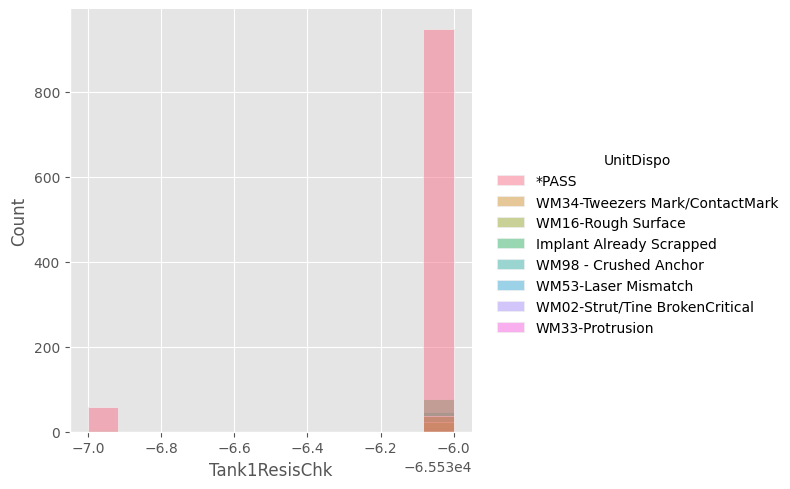

In [9]:
sns.displot(dataset_20mm, x='Tank1ResisChk',hue='UnitDispo')

El feature Tank1ResisChk no provee valor para predecir la disposicion de las unidades dado que la gran mayoria estan en uno de los dos valores posibles. Este atributo se eliminara.

Por lo tanto, al final se mantienen 8 atributos para las dos clases en cuestion:
- Tank1EPProcessTemperature: Temperatura del tanque.
- Tank1EPPumpSpeed: Velocidad de bombeo.
- Tank1EPPumpFlow: Flujo de bombeo.
- EPMassEndRunDT: Tiempo de proceso.
- tank_chg_period: Tiempo entre cambios de tanque.
- group_index: grupo de esqueletos.
- Qty Rem: La cantidad de material (en gramos) que se perdio durante el proceso de formado.

In [10]:
dataset_20mm = dataset_20mm.drop(columns=['Tank1ResisChk'])

In [11]:
dataset_20mm.head(100)

,Tank1EPProcessTemperature,Tank1EPPumpSpeed,Tank1EPPumpFlow,EPMassEndRunDT,tank_chg_period,group_index,Qty Rem,UnitDispo,Broken
7,-59.32403,1374.678,6.924414,06:38.8,0 days 08:15:25,1,39.1,*PASS,No
8,-59.47844,1373.398,6.901890,06:16.5,0 days 08:15:25,1,40.9,WM34-Tweezers Mark/ContactMark,No
9,-59.34805,1365.239,7.110339,08:09.0,0 days 08:15:25,1,39.6,*PASS,No
10,-59.42452,1368.157,6.715863,07:25.7,0 days 08:15:25,1,40.0,*PASS,No
11,-59.41494,1384.787,6.880256,09:20.4,0 days 08:15:25,1,40.5,*PASS,No
...,...,...,...,...,...,...,...,...,...
140,-59.35805,1377.108,6.924267,34:58.6,0 days 18:20:25,6,39.8,*PASS,No
141,-59.19410,1375.153,6.948749,34:34.7,0 days 18:20:25,6,40.1,*PASS,No
142,-59.23961,1394.119,6.797583,35:39.1,0 days 18:20:25,6,40.9,*PASS,No
143,-59.42232,1394.965,6.988155,35:12.6,0 days 18:20:25,6,40.1,*PASS,No


Ya con el primer barrido de atributos listo, se procede a transformar los datos le las columnas que pueden ser complicados de manejar, como las dos columnas que tienen datos de tiempo. Pero antes, se va a revisar si hay NaN y eliminar esas instancias. Ademas, se revisa el tipo de datos por feature:

In [12]:
dataset_20mm.isnull().sum()

Tank1EPProcessTemperature     0
Tank1EPPumpSpeed              0
Tank1EPPumpFlow               0
EPMassEndRunDT                0
tank_chg_period               0
group_index                   0
Qty Rem                       0
UnitDispo                    22
Broken                        0
dtype: int64

In [13]:
dataset_20mm.dropna(inplace=True)
dataset_20mm.isnull().sum()

Tank1EPProcessTemperature    0
Tank1EPPumpSpeed             0
Tank1EPPumpFlow              0
EPMassEndRunDT               0
tank_chg_period              0
group_index                  0
Qty Rem                      0
UnitDispo                    0
Broken                       0
dtype: int64

In [14]:
dataset_20mm.shape

(1213, 9)

In [15]:
for attribute in dataset_20mm:
    print(f"{attribute} is type {dataset_20mm[attribute].dtype}")

Tank1EPProcessTemperature is type float64
Tank1EPPumpSpeed is type float64
Tank1EPPumpFlow is type float64
EPMassEndRunDT is type object
tank_chg_period is type object
group_index is type int64
Qty Rem is type float64
UnitDispo is type object
Broken is type object


Ahora se procede a cambiar los tipos object a valores numericos. Necesitamos una funcion que cambia el formato actual a minutos:

In [16]:
def convertir_a_minutos(dato_objeto):
    # Utilizar expresión regular para extraer días, horas, minutos y segundos
    dato_objeto = re.sub(r'\s', '', dato_objeto)
    match = re.match(r'(\d+)days(\d+):(\d+):(\d+)', dato_objeto)
    match2 = re.match(r'(\d+):(\d+).(\d+)', dato_objeto)
    if match:
        dias, horas, minutos, segundos = map(int, match.groups())
        # Crear un objeto timedelta
        intervalo_tiempo = timedelta(days=dias, hours=horas, minutes=minutos, seconds=segundos)
        # Convertir a minutos
        minutos_totales = intervalo_tiempo.total_seconds() / 60
        return minutos_totales
    elif match2:
        horas, minutos, segundos = map(int, match2.groups())
        # Crear un objeto timedelta
        intervalo_tiempo = timedelta(hours=horas, minutes=minutos, seconds=segundos)
        # Convertir a minutos
        minutos_totales = intervalo_tiempo.total_seconds() / 60
        return minutos_totales
    else:
        raise ValueError("Formato no válido")

In [17]:
# Cambiando tank_chg_period
for ind in dataset_20mm.index:
    dataset_20mm['tank_chg_period'][ind] = convertir_a_minutos(dataset_20mm['tank_chg_period'][ind])

C:\Users\yoksa\AppData\Local\Temp\ipykernel_39552\4267524449.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_20mm['tank_chg_period'][ind] = convertir_a_minutos(dataset_20mm['tank_chg_period'][ind])
C:\Users\yoksa\AppData\Local\Temp\ipykernel_39552\4267524449.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_20mm['tank_chg_period'][ind] = convertir_a_minutos(dataset_20mm['tank_chg_period'][ind])
C:\Users\yoksa\AppData\Local\Temp\ipykernel_39552\4267524449.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://p

In [18]:
dataset_20mm.head(100)

,Tank1EPProcessTemperature,Tank1EPPumpSpeed,Tank1EPPumpFlow,EPMassEndRunDT,tank_chg_period,group_index,Qty Rem,UnitDispo,Broken
7,-59.32403,1374.678,6.924414,06:38.8,495.416667,1,39.1,*PASS,No
8,-59.47844,1373.398,6.901890,06:16.5,495.416667,1,40.9,WM34-Tweezers Mark/ContactMark,No
9,-59.34805,1365.239,7.110339,08:09.0,495.416667,1,39.6,*PASS,No
10,-59.42452,1368.157,6.715863,07:25.7,495.416667,1,40.0,*PASS,No
11,-59.41494,1384.787,6.880256,09:20.4,495.416667,1,40.5,*PASS,No
...,...,...,...,...,...,...,...,...,...
140,-59.35805,1377.108,6.924267,34:58.6,1100.416667,6,39.8,*PASS,No
141,-59.19410,1375.153,6.948749,34:34.7,1100.416667,6,40.1,*PASS,No
142,-59.23961,1394.119,6.797583,35:39.1,1100.416667,6,40.9,*PASS,No
143,-59.42232,1394.965,6.988155,35:12.6,1100.416667,6,40.1,*PASS,No


In [19]:
# Cambiando EPMassEndRunDT
for ind in dataset_20mm.index:
    dataset_20mm['EPMassEndRunDT'][ind] = convertir_a_minutos(dataset_20mm['EPMassEndRunDT'][ind])

C:\Users\yoksa\AppData\Local\Temp\ipykernel_39552\2764616710.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_20mm['EPMassEndRunDT'][ind] = convertir_a_minutos(dataset_20mm['EPMassEndRunDT'][ind])
C:\Users\yoksa\AppData\Local\Temp\ipykernel_39552\2764616710.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_20mm['EPMassEndRunDT'][ind] = convertir_a_minutos(dataset_20mm['EPMassEndRunDT'][ind])
C:\Users\yoksa\AppData\Local\Temp\ipykernel_39552\2764616710.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://panda

In [20]:
dataset_20mm.head(100)

,Tank1EPProcessTemperature,Tank1EPPumpSpeed,Tank1EPPumpFlow,EPMassEndRunDT,tank_chg_period,group_index,Qty Rem,UnitDispo,Broken
7,-59.32403,1374.678,6.924414,398.133333,495.416667,1,39.1,*PASS,No
8,-59.47844,1373.398,6.901890,376.083333,495.416667,1,40.9,WM34-Tweezers Mark/ContactMark,No
9,-59.34805,1365.239,7.110339,489.0,495.416667,1,39.6,*PASS,No
10,-59.42452,1368.157,6.715863,445.116667,495.416667,1,40.0,*PASS,No
11,-59.41494,1384.787,6.880256,560.066667,495.416667,1,40.5,*PASS,No
...,...,...,...,...,...,...,...,...,...
140,-59.35805,1377.108,6.924267,2098.1,1100.416667,6,39.8,*PASS,No
141,-59.19410,1375.153,6.948749,2074.116667,1100.416667,6,40.1,*PASS,No
142,-59.23961,1394.119,6.797583,2139.016667,1100.416667,6,40.9,*PASS,No
143,-59.42232,1394.965,6.988155,2112.1,1100.416667,6,40.1,*PASS,No


In [21]:
dataset_20mm = dataset_20mm.convert_dtypes()
for attribute in dataset_20mm:
    print(f"{attribute} is type {dataset_20mm[attribute].dtype}")

Tank1EPProcessTemperature is type Float64
Tank1EPPumpSpeed is type Float64
Tank1EPPumpFlow is type Float64
EPMassEndRunDT is type Float64
tank_chg_period is type Float64
group_index is type Int64
Qty Rem is type Float64
UnitDispo is type string
Broken is type string


Ahora se procede a normalizar los atributos:

In [22]:
# Guarda la última columna
column_stored = dataset_20mm[['UnitDispo','Broken']]

# Elimina la última columna antes de la normalización
data_normalized = dataset_20mm[['Tank1EPProcessTemperature','Tank1EPPumpSpeed','Tank1EPPumpFlow','EPMassEndRunDT','tank_chg_period','group_index','Qty Rem']]

In [23]:
column_stored.head()

,UnitDispo,Broken
7,*PASS,No
8,WM34-Tweezers Mark/ContactMark,No
9,*PASS,No
10,*PASS,No
11,*PASS,No


In [24]:
# Normalización, limitando a 6 decimales
for instance in data_normalized:
    minValue = data_normalized[instance].min()
    maxValue = data_normalized[instance].max()
    data_normalized[instance] = (((data_normalized[instance] - minValue) / (maxValue - minValue))).round(6)

# Uniendo las ultimas 4 columnas
dataset_20mm = pd.concat([data_normalized, column_stored], axis=1)

dataset_20mm.head(20)

C:\Users\yoksa\AppData\Local\Temp\ipykernel_39552\2015928106.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_normalized[instance] = (((data_normalized[instance] - minValue) / (maxValue - minValue))).round(6)


,Tank1EPProcessTemperature,Tank1EPPumpSpeed,Tank1EPPumpFlow,EPMassEndRunDT,tank_chg_period,group_index,Qty Rem,UnitDispo,Broken
7,0.388584,0.159765,0.334163,0.109608,0.088352,0.0,0.197076,*PASS,No
8,0.320665,0.159616,0.333037,0.103475,0.088352,0.0,0.207602,WM34-Tweezers Mark/ContactMark,No
9,0.378019,0.158667,0.343457,0.134885,0.088352,0.0,0.2,*PASS,No
10,0.344383,0.159006,0.323737,0.122678,0.088352,0.0,0.202339,*PASS,No
11,0.348596,0.160941,0.331955,0.154654,0.088352,0.0,0.205263,*PASS,No
12,0.365988,0.159984,0.329906,0.160518,0.088352,0.0,0.207018,*PASS,No
29,0.343666,0.164135,0.337352,0.722701,0.062133,0.015152,0.202339,*PASS,No
30,0.516811,0.163888,0.337643,0.773871,0.062133,0.015152,0.19883,WM16-Rough Surface,No
31,0.334156,0.167057,0.344703,0.77885,0.062133,0.015152,0.197661,*PASS,No
32,0.369089,0.165445,0.334037,0.786666,0.062133,0.015152,0.194737,WM16-Rough Surface,No


Ya con los atributos listos, vamos a analizar un poco como responder estos con las clases, asi como analizar como se ven las clases en si. Veamos la distribucion de datos con respecto a la clase UnitDispo:

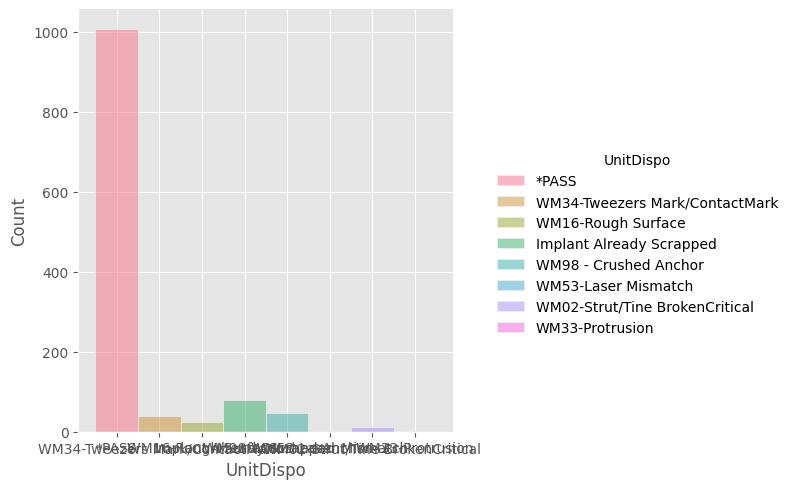

In [25]:
sns.displot(dataset_20mm, x='UnitDispo', hue='UnitDispo')

El set de datos no balanceado con respecto a la cantidad de unidades que son consideradas PASS. Veamos la cantidad de datos de forma numeral:

In [26]:
print(dataset_20mm['UnitDispo'].value_counts())

UnitDispo
*PASS                             1006
Implant Already Scrapped            79
WM98 - Crushed Anchor               47
WM34-Tweezers Mark/ContactMark      39
WM16-Rough Surface                  24
WM02-Strut/Tine BrokenCritical      12
WM53-Laser Mismatch                  3
WM33-Protrusion                      3
Name: count, dtype: Int64


Analizando estas cantidad, podemos notar que, de los defectos listados, solo se tienen 4 defectos que estan relacionados con los procesos quimicos y fisicos que se realizan para darle la forma final al esqueleto: Crushed Anchor (quebradura en las anclas del esqueleto), Rough Surface (superficie aspera), Strut/Tine BrokenCritical (esqueleto quebrado) y Protrusion (protuberancia en la superficie). Si sumamos la cantidad de esos defectos da 86, lo cual ni siquiera representa el 10% de la cantidad de datos PASS. Esta clase esta muy desbalanceada, y balancearla nos dejaria con pocas instancias.

Ademas, nos interesan solo las unidades PASS dado que son las que estan llegado a la prueba de estres. Por esta razon, se filtra por solo la condicion de PASS y se descarta la columna:

In [27]:
dataset_20mm = dataset_20mm.loc[dataset_Wathcmen['UnitDispo'] == "*PASS"]
dataset_20mm = dataset_20mm.drop(columns=['UnitDispo'])
dataset_20mm.head()

,Tank1EPProcessTemperature,Tank1EPPumpSpeed,Tank1EPPumpFlow,EPMassEndRunDT,tank_chg_period,group_index,Qty Rem,Broken
7,0.388584,0.159765,0.334163,0.109608,0.088352,0.0,0.197076,No
9,0.378019,0.158667,0.343457,0.134885,0.088352,0.0,0.2,No
10,0.344383,0.159006,0.323737,0.122678,0.088352,0.0,0.202339,No
11,0.348596,0.160941,0.331955,0.154654,0.088352,0.0,0.205263,No
12,0.365988,0.159984,0.329906,0.160518,0.088352,0.0,0.207018,No


In [28]:
dataset_20mm.shape

(1006, 8)

### Analisis de los atributos con respecto a la clase

Ya con esta parte del pre-procesamiento completado, se procede a ver cual es la relacion que existe entre los atributos y la clase.

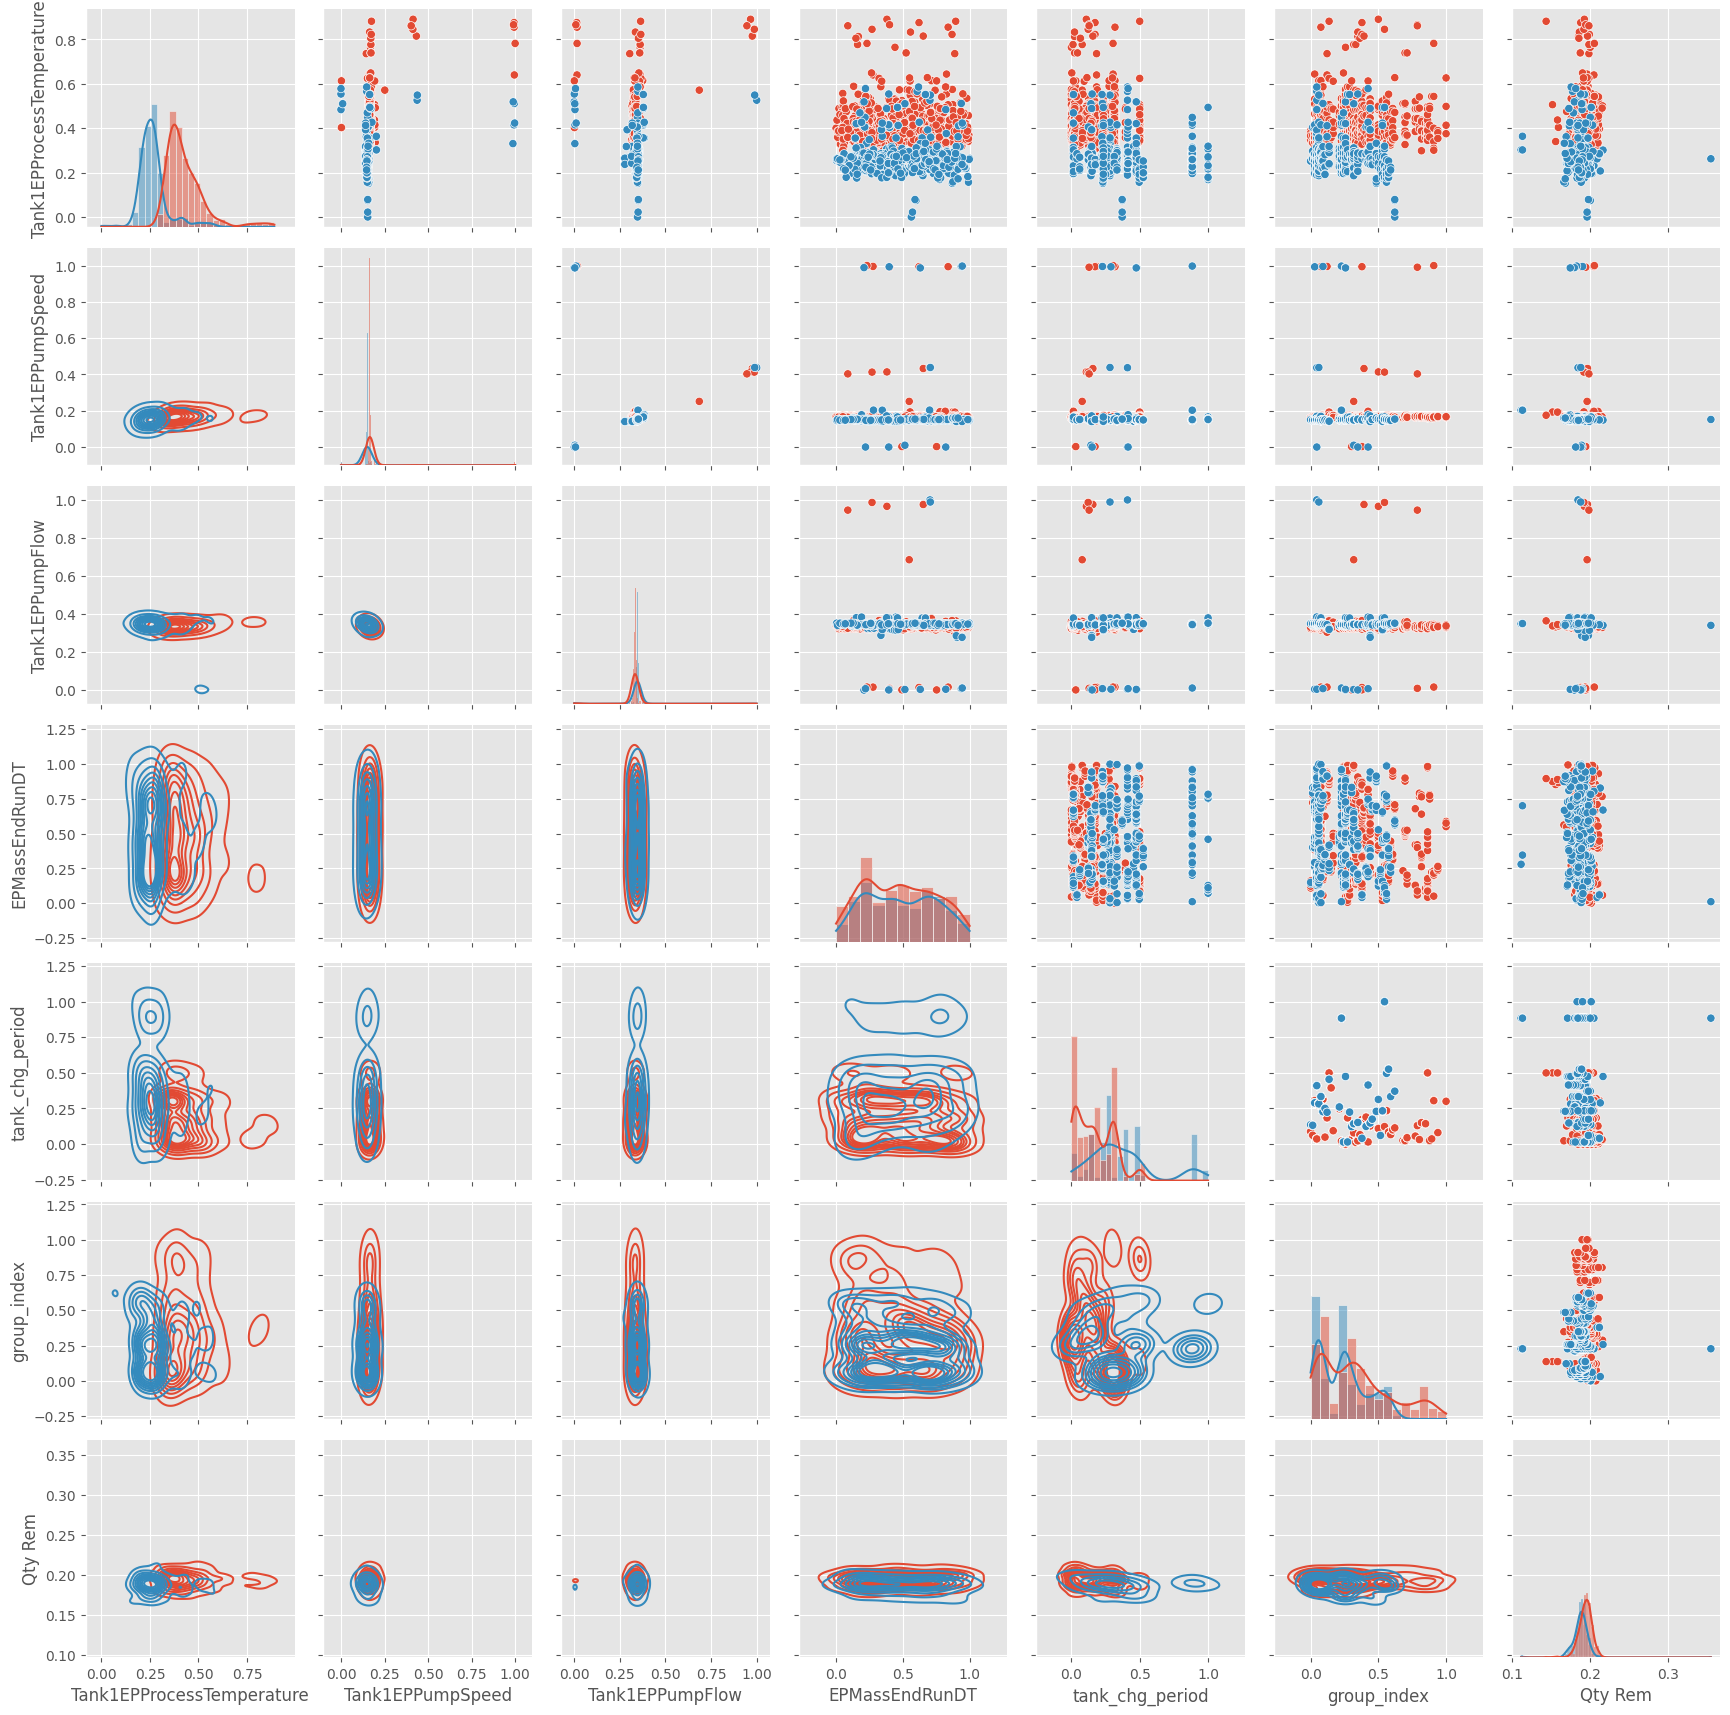

In [29]:
g = sns.PairGrid(dataset_20mm,hue='Broken')
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot, kde=True)

Despues de ver las relaciones que existen, se concluyen dos cosas:
- Los atributos Tank1EPPumpSpeed y Tank1EPPumpFlow no dan mucha informacion dado que sus variacion es muy baja. Esto podria provocar ruido para el modelo; por lo tanto, se pueden eliminar.
- El atributo Qty Rem parece que tiene pocos outliers que hacen que la resolucion de este contra la case se vea tan claro. Para eliminar este efecto, se van a eliminar esos outliers del dataset.

Primero desechamos Tank1EPPumpSpeed y Tank1EPPumpFlow:

In [30]:
dataset_20mm = dataset_20mm.drop(columns=['Tank1EPPumpSpeed','Tank1EPPumpFlow'])
dataset_20mm.head()

,Tank1EPProcessTemperature,EPMassEndRunDT,tank_chg_period,group_index,Qty Rem,Broken
7,0.388584,0.109608,0.088352,0.0,0.197076,No
9,0.378019,0.134885,0.088352,0.0,0.2,No
10,0.344383,0.122678,0.088352,0.0,0.202339,No
11,0.348596,0.154654,0.088352,0.0,0.205263,No
12,0.365988,0.160518,0.088352,0.0,0.207018,No


Luego se van a eliminar los outliers de Qty Rem. Vamos a analizar cuales son esos valores y crear un pequeno algoritmo para eliminarlos:

<Axes: xlabel='Qty Rem', ylabel='Count'>

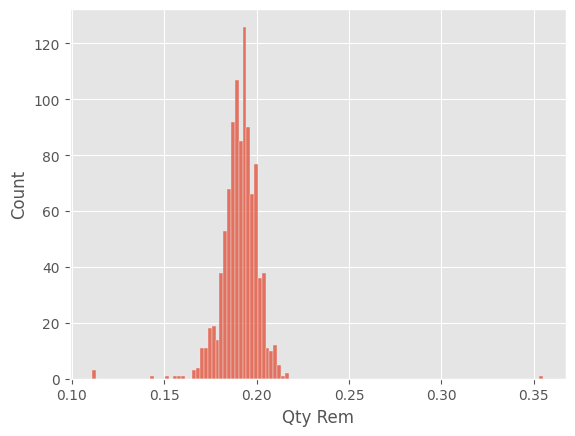

In [31]:
sns.histplot(dataset_20mm['Qty Rem'])

Parece ser que los outliers estan fuera de los limites 0.15 y 0.23.

In [32]:
for ind in dataset_20mm.index:
    if dataset_20mm.loc[ind,'Qty Rem'] < 0.15 or dataset_20mm.loc[ind,'Qty Rem'] > 0.23:
        dataset_20mm.loc[ind,'Qty Rem'] = pd.NA

In [33]:
dataset_20mm.dropna(inplace=True)

In [34]:
dataset_20mm.head()

,Tank1EPProcessTemperature,EPMassEndRunDT,tank_chg_period,group_index,Qty Rem,Broken
7,0.388584,0.109608,0.088352,0.0,0.197076,No
9,0.378019,0.134885,0.088352,0.0,0.2,No
10,0.344383,0.122678,0.088352,0.0,0.202339,No
11,0.348596,0.154654,0.088352,0.0,0.205263,No
12,0.365988,0.160518,0.088352,0.0,0.207018,No


Veamos como luce este atributo ahora sin los outliers:

<Axes: xlabel='Qty Rem', ylabel='Count'>

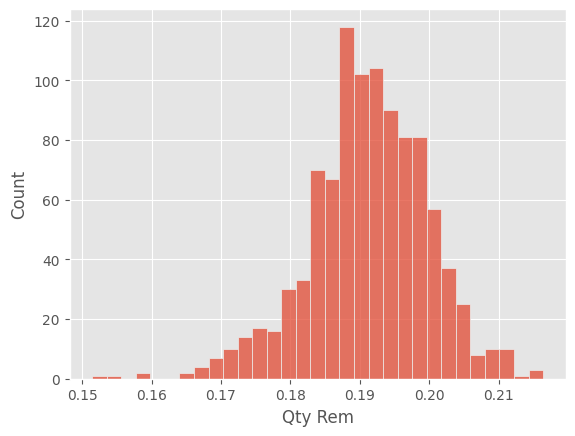

In [35]:
sns.histplot(dataset_20mm['Qty Rem'])

Con estos cambios listos, se procede a volver a analizar los atributos contra la clase:

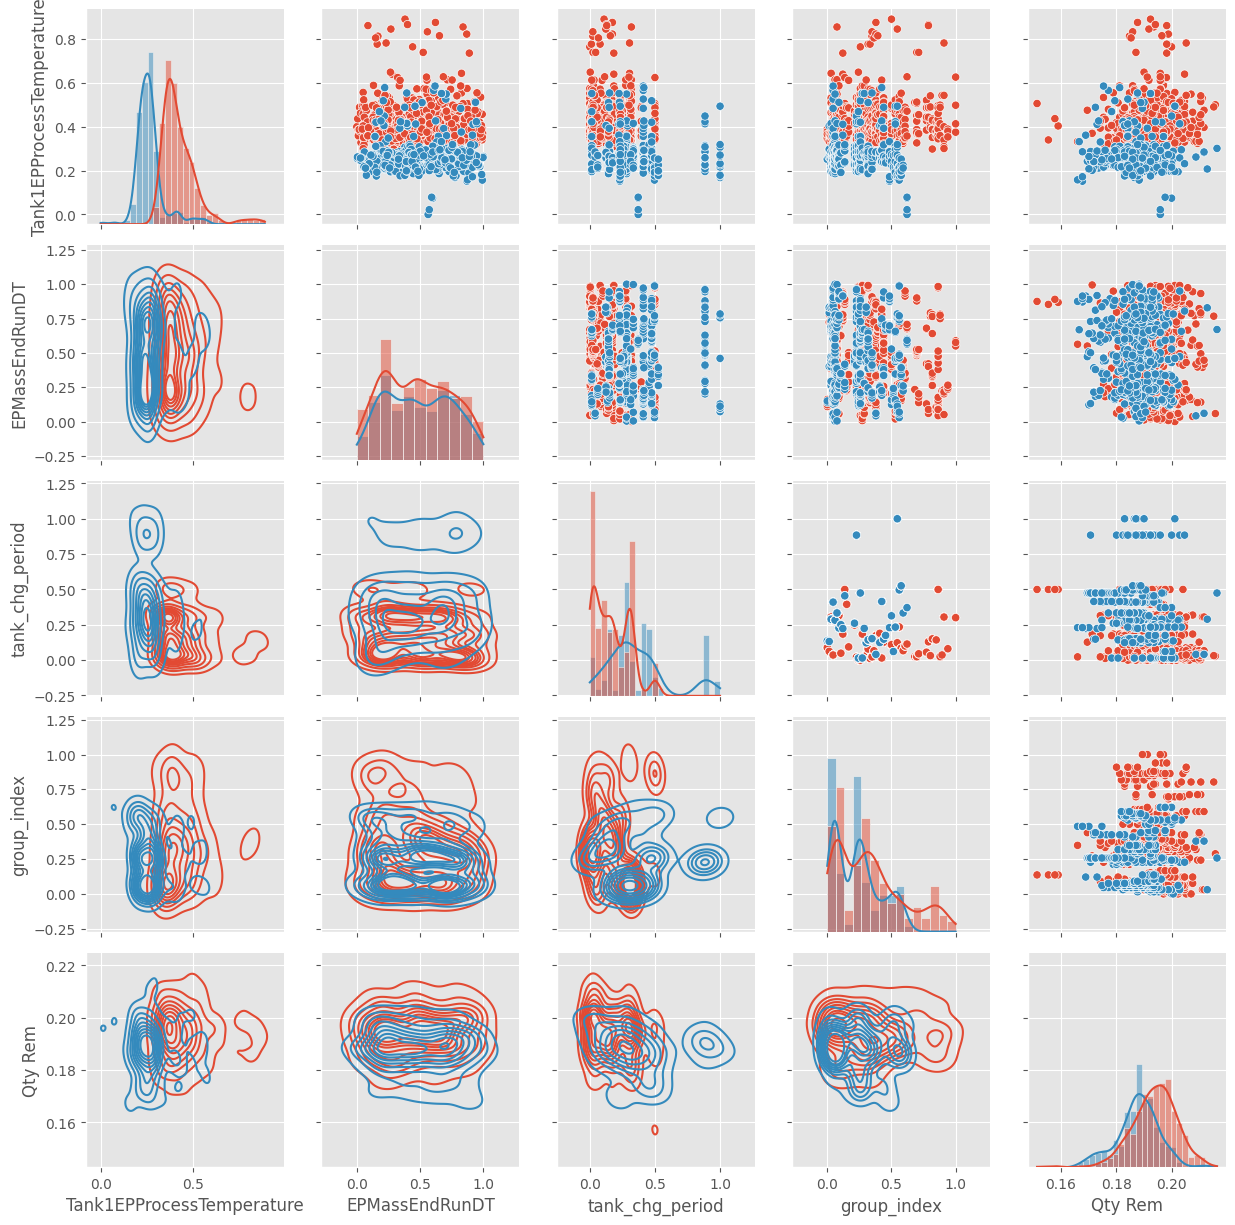

In [36]:
g = sns.PairGrid(dataset_20mm,hue='Broken')
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot, kde=True)

A este punto, se pueden observar buenas relaciones entre los atributos y la clase. La etapa de pre-procesado esta practicamente lista, pero para finalizar, se procede a codificar Broken en 0 y 1, dado que tenemos que tener datos numericos que puedan ser usados en los modelos de ML:

In [37]:
dataset_20mm['Broken'].astype

<bound method NDFrame.astype of 7        No
9        No
10       No
11       No
12       No
       ... 
2023    Yes
2063    Yes
2064    Yes
2065    Yes
2066    Yes
Name: Broken, Length: 1001, dtype: string>

In [38]:
# Es necesario cambiar el tipo de columna a object para poder usar la funcion replace, dado que esta no puede hacer un cambio entre str a numeric
dataset_20mm['Broken'] = dataset_20mm['Broken'].astype(object)

dataset_20mm['Broken'].replace('No',0,inplace=True)
dataset_20mm['Broken'].replace('Yes',1,inplace=True)
dataset_20mm.head()

,Tank1EPProcessTemperature,EPMassEndRunDT,tank_chg_period,group_index,Qty Rem,Broken
7,0.388584,0.109608,0.088352,0.0,0.197076,0
9,0.378019,0.134885,0.088352,0.0,0.2,0
10,0.344383,0.122678,0.088352,0.0,0.202339,0
11,0.348596,0.154654,0.088352,0.0,0.205263,0
12,0.365988,0.160518,0.088352,0.0,0.207018,0


In [39]:
dataset_20mm.shape

(1001, 6)

Con esto damos por concluida la etapa de pre-procesado del data set, y contamos con algo muy manejable: 6 features o atributos, un clase y 1001 instancias. Viendo la interacion de estos atributos con la clase, podemos concluir que este es un problema de complejidad media o alta, por lo tanto, vamos a tratar con modelos de categorizacion de complejidad media, y, al final, haciendo una prueba con una Red Neuronal.

Para empezar con la parte de modelado, dividamos nuestro set de datos entre entrenamiento y prueba:

In [40]:
attributes = dataset_20mm[['Tank1EPProcessTemperature','EPMassEndRunDT','tank_chg_period','group_index','Qty Rem']]
class1 = dataset_20mm['Broken']

In [41]:
attributes.head()

,Tank1EPProcessTemperature,EPMassEndRunDT,tank_chg_period,group_index,Qty Rem
7,0.388584,0.109608,0.088352,0.0,0.197076
9,0.378019,0.134885,0.088352,0.0,0.2
10,0.344383,0.122678,0.088352,0.0,0.202339
11,0.348596,0.154654,0.088352,0.0,0.205263
12,0.365988,0.160518,0.088352,0.0,0.207018


In [42]:
class1.head()

7     0
9     0
10    0
11    0
12    0
Name: Broken, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split
#se procede a dividir los datos en una proporción de 80/20
X_train, X_test, y_train, y_test = train_test_split(attributes,class1, test_size=0.20)
print('Size of Train Data: ' + str(len(X_train)))
print('Size of Test Data: ' + str(len(X_test)))

Size of Train Data: 800
Size of Test Data: 201


### Primer Modelo: Support Vector Classification (SVC)

In [44]:
from sklearn.svm import SVC

# C es un parametro de regularizacion que siempre tiene que ser positivo, y la fuerza del hyperparametro es inversamente proporcional al valor. Se setea el seed a 20 para efectos de reproducibilidad
svcModel = SVC(kernel="rbf", C=0.025, random_state=20)

In [45]:
svcModel.get_params()

{'C': 0.025,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 20,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [46]:
# Entrenamiento
svcModel.fit(X_train,y_train)

SVC(C=0.025, random_state=20)

In [47]:
# Prediccion
y_predicted_training = svcModel.predict(X_train)
y_predicted_test = svcModel.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train, y_predicted_training)

0.8425

In [49]:
accuracy_score(y_test, y_predicted_test)

0.8656716417910447

Con este modelo estamos logrando resultados aceptables, pero podemos mejorarlo. Vamos jugar un poco con los hyperparametros y ver si logramos mejorar aun mas los resultados. Para poder visualizar el efecto, se hara una grafica entre el Accuracy y el hyperparametro que estamos variando:

In [50]:
# Maximo limite del hyperparametro C, el cual va a ser divido entre 100 para que quede menor a 1
c_limit = 99

In [51]:
# Datos de entrenamiento
accuracy_train =[]
for hyperC in range(1,c_limit):
    svcModel = SVC(kernel="rbf", C= float(hyperC/100), random_state=20)
    svcModel.fit(X_train,y_train)
    y_predicted_training = svcModel.predict(X_train)
    acc=round((accuracy_score(y_train, y_predicted_training) * 100), 2)
    accuracy_train.append(acc)

In [52]:
# Datos de pruebas
accuracy_test =[]
for hyperC in range(1,c_limit):
    svcModel = SVC(kernel="rbf", C= float(hyperC/100), random_state=20)
    svcModel.fit(X_test,y_test)
    y_predicted_test = svcModel.predict(X_test)
    acc=round((accuracy_score(y_test, y_predicted_test) * 100), 2)
    accuracy_test.append(acc)

In [53]:
# Creando el Eje X del grafico
x_axis =[]
for value in range(1,c_limit):
    x_axis.append(value/100)

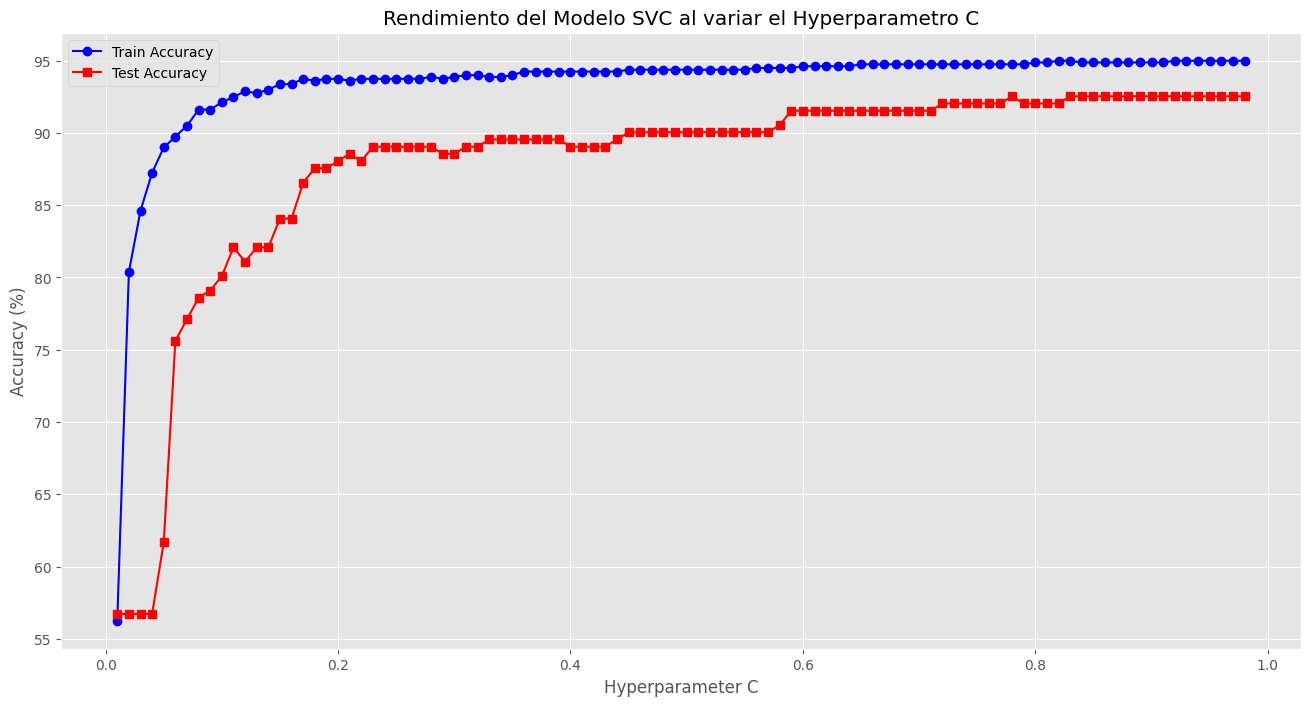

In [54]:
# Ploteo de los score contra la variacion de los hyperparametros
plt.figure(figsize=(16, 8))
plt.plot(x_axis, accuracy_train, color='blue', marker='o', label='Train Accuracy')
plt.plot(x_axis, accuracy_test, color='red', marker='s', label='Test Accuracy')
plt.title("Rendimiento del Modelo SVC al variar el Hyperparametro C")
plt.ylabel("Accuracy (%)")
plt.xlabel("Hyperparameter C")
plt.legend()
plt.show()